
Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?<br>
2.) What was the daily return of the stock on average?<br>
3.) What was the moving average of the various stocks?<br>
4.) What was the correlation between different stocks' closing prices?<br>
4.) What was the correlation between different stocks' daily returns?<br>
5.) How much value do we put at risk by investing in a particular stock?<br>
6.) How can we attempt to predict future stock behavior?<br>

In [1]:
# standard imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# for reading stock info from Yahoo
from pandas.io.data import DataReader

# for time stamps
from datetime import datetime

# for division
from __future__ import division

In [2]:
# Lets use Yahoo to grab some data for some tech stocks
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
# Set up start and end times for data grab
# start a year ago from today's date
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


In [4]:
#For loop for grabbing Yahoo Finance data and setting as a dataframe
# globals is setting ticker symbol as dataframe name
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [5]:
# overview of dataframe
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,116.063056,117.034167,114.979881,115.989048,5.229620e+07,115.267461
std,11.915090,11.898670,11.809891,11.846506,2.061597e+07,12.276802
min,94.260002,94.820000,93.279999,94.480003,1.447960e+07,93.312514
25%,104.657499,105.372503,104.304999,105.040001,3.849822e+07,103.742022
50%,117.995002,119.134998,116.350003,118.114998,4.784885e+07,117.161290
75%,127.142502,127.907497,125.982502,126.912502,6.082465e+07,126.599998
max,134.460007,134.539993,131.399994,133.000000,1.898463e+08,132.539993


In [6]:
# general info on dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2014-07-28 to 2015-07-27
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


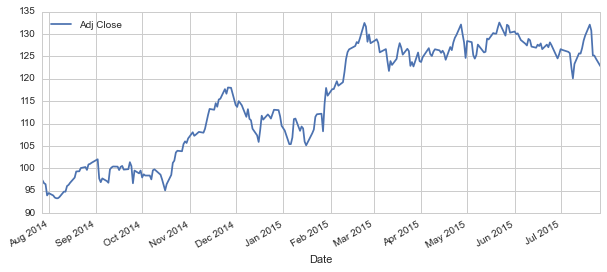

In [7]:
# plot adjusted closing price for past year
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

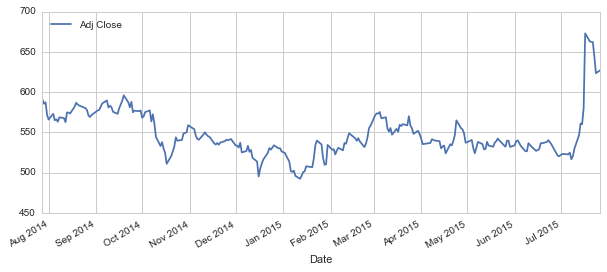

In [8]:
# plot adjusted closing price for past year
GOOG['Adj Close'].plot(legend=True,figsize=(10,4))

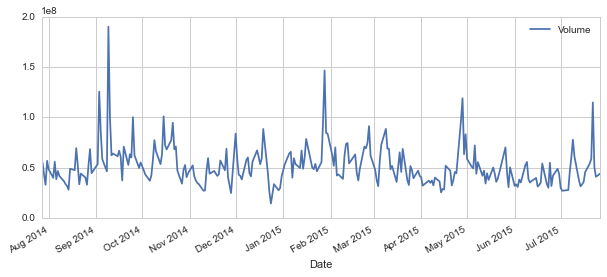

In [9]:
# Daily trading volume past year
AAPL['Volume'].plot(legend=True,figsize=(10,4))

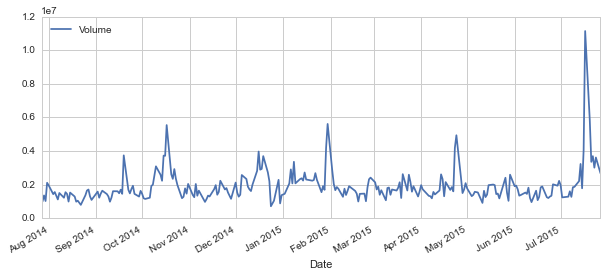

In [10]:
# Daily trading volume past year
GOOG['Volume'].plot(legend=True,figsize=(10,4))

In [17]:
# now we'll look at moving averages
# plotting 3 moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    # create a new column taking two arguments for each average
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

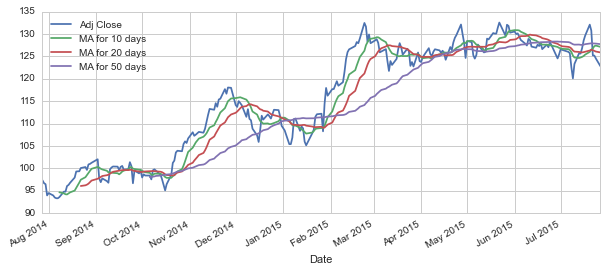

In [18]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

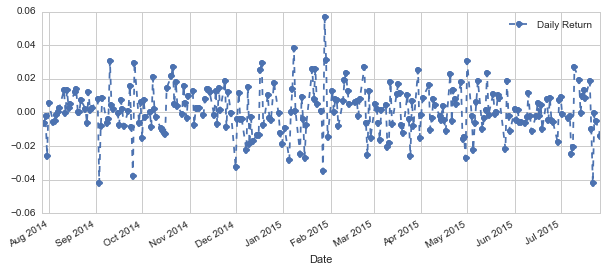

In [22]:
# now look at daily returns and risk of stock

# on any given day what was the percent return on your money
# make a new column for Daily Return
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

# plot and set viz options
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')


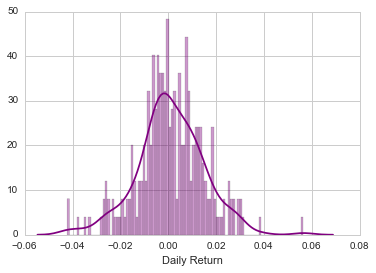

In [23]:
# now look at average daily return using Seaborn
# two plots together (kde + histogram)
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [26]:
# now lets look at all the stocks
# make a new dataframe with the Adj Close from the tech_list
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [27]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-07-28,97.312368,320.410004,590.602636,42.837953
2014-07-29,96.683405,320.000000,585.612633,42.760011
2014-07-30,96.457376,322.510010,587.422650,42.457994
2014-07-31,93.951349,312.989990,571.602530,42.048806
2014-08-01,94.472207,307.059998,566.072594,41.756530


In [28]:
# another new dataframe with returns
tech_rets = closing_df.pct_change()

In [30]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-07-28,NaN,NaN,NaN,NaN
2014-07-29,-0.006463,-0.001280,-0.008449,-0.001819
2014-07-30,-0.002338,0.007844,0.003091,-0.007063
2014-07-31,-0.025981,-0.029519,-0.026931,-0.009637
2014-08-01,0.005544,-0.018946,-0.009674,-0.006951


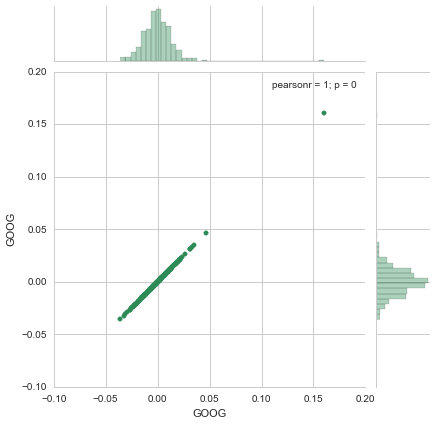

In [32]:
# look up joint plot for docs
# linear correlation
# comparing the same stock
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter', color='seagreen')

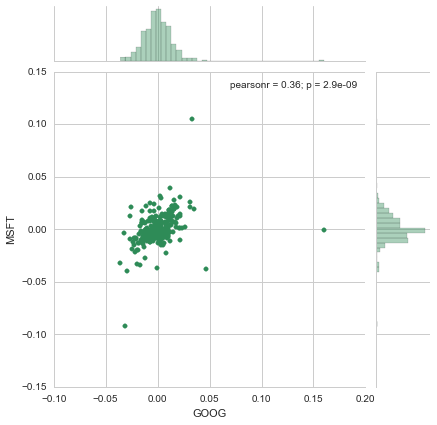

In [33]:
#comparing different stocks
sns.jointplot('GOOG','MSFT',tech_rets,kind = 'scatter', color='seagreen')

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

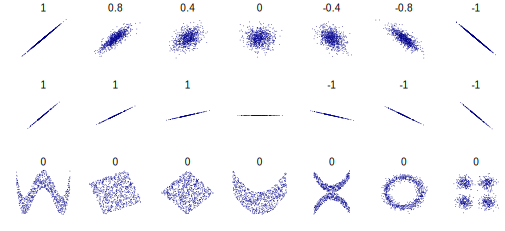

In [37]:
# display SVG inline
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')